In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and di

### svd 연습하기

출처 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-20-%ED%8A%B9%EC%9D%B4%EA%B0%92-%EB%B6%84%ED%95%B4Singular-Value-Decomposition

In [ ]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)



원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### 유클라디안 거리를 이용한 유사도 구하기

In [ ]:
critics={
     'hhd':{'guardians of the galaxy 2':5,'christmas in august':4,'boss baby':1.5},
     'chs':{'christmas in august':5,'boss baby':2},
     'kmh':{'guardians of the galaxy 2':2.5,'christmas in august':2,'boss baby':1},
     'leb':{'guardians of the galaxy 2':3.5,'christmas in august':4,'boss baby':5}
}

In [ ]:
from math import sqrt

def sim_distance(data, name1, name2):
    sum=0
    for i in data[name1]:
        if i in data[name2]: #같은 영화를 봤다면
            sum+=pow(data[name1][i]- data[name2][i],2)
        
    return 1/(1+sqrt(sum))

In [ ]:
sim_distance(critics, 'chs','leb')

0.2402530733520421

In [ ]:
def top_match(data, name, index=3, sim_function=sim_distance):
    li=[]
    for i in data:
        if name!=i: #자기 자신은 제외한다
            li.append((sim_function(data,name,i),i)) # 유사도, 이름을 튜플에 묶어 리스트에 추가한다
    li.sort() #오름차순 정렬
    li.reverse() #내림차순 정렬
    
    return li[:index]


In [ ]:
top_match(critics, 'chs')

[(0.4721359549995794, 'hhd'),
 (0.2402530733520421, 'leb'),
 (0.2402530733520421, 'kmh')]

### 상관계수를 이용한 영화추천하기

In [ ]:
critics = {
    '차현석': {
        '택시운전사': 2.5,
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        '범죄도시': 3.5,
        '아이 캔 스피크': 2.5,
        'The Night Listener': 3.0,
    },
    '황해도': {
        '택시운전사': 1.0,
        '남한산성': 4.5,
        '킹스맨:골든서클': 0.5,
        '범죄도시': 1.5,
        '아이 캔 스피크': 4.5,
        'The Night Listener': 5.0,
    },
    '김미희': {
        '택시운전사': 3.0,
        '남한산성': 3.5,
        '킹스맨:골든서클': 1.5,
        '범죄도시': 5.0,
        'The Night Listener': 3.0,
        '아이 캔 스피크': 3.5,
    },
    '김준형': {
        '택시운전사': 2.5,
        '남한산성': 3.0,
        '범죄도시': 3.5,
        'The Night Listener': 4.0,
    },
    '이은비': {
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        'The Night Listener': 4.5,
        '범죄도시': 4.0,
        '아이 캔 스피크': 2.5,
    },
    '임명진': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        '킹스맨:골든서클': 2.0,
        '범죄도시': 3.0,
        'The Night Listener': 3.5,
        '아이 캔 스피크': 2.0,
    },
    '심수정': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        'The Night Listener': 3.0,
        '범죄도시': 5.0,
        '아이 캔 스피크': 3.5,
    },
    '박병관': {'남한산성': 4.5, '아이 캔 스피크': 1.0,
             '범죄도시': 4.0},
}

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
from matplotlib import font_manager, rc #한글이 나오게
plt.rc('font', family='NanumBarunGothic') 


In [ ]:
# critics data 이용해 scatter plot 그리기
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8)) # plot 크기설정
    
    # plot 좌표를 위한 list 선언
    li = []
    li2 = []
    
    for i in critics[name1]: # i = 키 값
        if i in data[name2]: # 같은 영화를 평가했을때만
            li.append(critics[name1][i]) # name1의 평점 li[]에 추가
            li2.append(critics[name2][i]) # name2의 평점 li2[]에 추가
            plt.text(critics[name1][i],critics[name2][i],i) # 영화 제목 text 찍기
            
    plt.plot(li,li2,'ro') #plot그리기
    
    #각 축의 크기 설정 (0에서 6까지)
    plt.axis([0,6,0,6])
 
    # x축과 y축 이름 설정
    plt.xlabel(name1)
    plt.ylabel(name2)
 
    # 그리기
    plt.show()



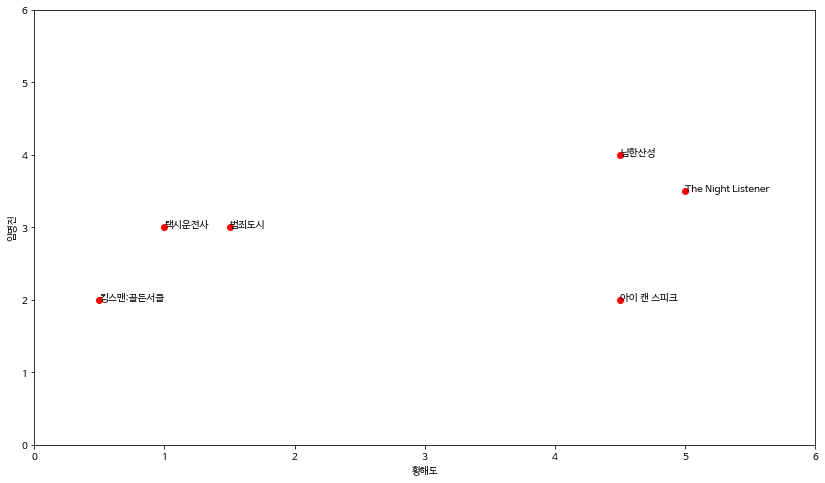

In [ ]:
drawGraph(critics,'황해도','임명진')

In [ ]:
# 피어슨 상관계수 구하기
def sim_pearson(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

In [ ]:
sim_pearson(critics,'황해도','임명진')

0.41791069697885247

In [ ]:
def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]

In [ ]:
top_match(critics, '박병관',6)

[(0.9912407071619299, '차현석'),
 (0.9244734516419049, '임명진'),
 (0.8934051474415647, '이은비'),
 (0.66284898035987, '심수정'),
 (0.38124642583151164, '김미희'),
 (-0.38124642583151164, '황해도')]

상관계수를 통해서 현석이와 병관이의 취향이 비슷한 것을 확인 할 수 있다.

In [ ]:
'''
top_match는 한 사람을 기준으로 다른 사람들과의 상관계수를 리턴하는 함수
결과는 (유사도,사람이름)이런식으로 리턴함
예를 들어 철수에게 영화를 추천한다고 하자.
반복문으로 철수와 다른사람과의 상관계수를 각각 name과 sim에 저장
만약 sim이 음수이면 다른 사람의 취향은 필요가 없으니 제외
먼저 유리의 경우
유리가 평가한 영화들을 하나씩 반복으로 뽑아서 이때 그 평가한 영화가 철수가 평가한 영화가 아니여야만 추천함(철수가 보지 않은 영화를 추천해야 하니까)
유리가 평가한 영화으 평점과 상관계수를 곱해서 score에 더함
score_dic에 영화제목과 score를 설정 
sim_dic에는 유리의 상관계수를 더해줌

'''




def getRecommendation (data,person,sim_function=sim_pearson):
    result = top_match(critics, person ,len(data))
    
    simSum=0 # 유사도 합을 위한 변수
    score=0 # 평점 합을 위한 변수
    li=[] # 리턴을 위한 리스트
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic
 
    for sim,name in result: # 튜플이므로 한번에 
        if sim<0 : continue #유사도가 양수인 사람만
        for movie in data[name]: 
            if movie not in data[person]: #name이 평가를 내리지 않은 영화
                score+=sim*data[name][movie] # 그사람의 영화평점 * 유사도
                score_dic.setdefault(movie,0) # 기본값 설정
                score_dic[movie]+=score # 합계 구함
 
                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie,0) 
                sim_dic[movie]+=sim
 
            score=0  #영화가 바뀌었으니 초기화한다
    
    for key in score_dic: 
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li


In [ ]:
getRecommendation(critics, '박병관')

[(3.467750847406967, 'The Night Listener'),
 (2.8325499182641614, '택시운전사'),
 (2.5309807037655645, '킹스맨:골든서클')]

출처 : https://kutar37.tistory.com/39

### movie_len을 가지고 하려면

- 평가자 943명중에서 아무나 하나 찝어서 얘한테 영화를 추천해준다고 하자??
- 혹은 가상의 인물을 만들어서 어떤 영화에 어떤 평점을 주었다고 가정할때 가상에 인물에게 영화를 추천

### 만약 아무런 정보도 없는 새로운 사람한테 추천하려면??

- 이경우에는 그냥 평점이 높은 영화를 추천
- 장르별로 추천
- 연령대에 따라서 추천

### CB를 이용할 경우

- 새로운 가입자가 키워드를 선택
- 이와 관련된 영화를 추천함

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ml-100k.csv')

In [4]:
df.shape

(100000, 4)

In [5]:
df.drop(columns = 'timestamp',inplace = True)

In [6]:
df.columns

Index(['user_id', 'item_id', 'rating'], dtype='object')

In [7]:
df.columns = (['userId','movieId','rating'])

### 원활한 데이터 분석을 위해서 새로운 데이터 프레임 만들기

In [8]:
adj_matrix_rating = df.pivot(index = 'userId', columns = 'movieId', values = 'rating')

In [9]:
adj_matrix_rating.T

userId,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import copy

adj_matrix = adj_matrix_rating.copy()
# 행렬의 결측치(사용자가 보지 않은 영화)에 대해 해당 사용자의 평균 평점으로 대치해줌
for i in range(adj_matrix_rating.shape[0]):
  adj_matrix.iloc[i] = adj_matrix_rating.iloc[i].fillna(0)
adj_matrix.head(5)

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ratings = adj_matrix.T

In [12]:
ratings.loc[1,1]

5.0

In [13]:
ratings.loc[:,10]
ratings.loc[:,10][ratings.loc[:,10]> 0].shape         #영화 리뷰 개수
ratings.loc[:,10][ratings.loc[:,10]>0].value_counts() #영화 리뷰 분포 확인하기

4.0    114
5.0     54
3.0     16
Name: 10, dtype: int64

### A리뷰자,B리뷰자와의 상관계수 구하는 함수 만들기

In [9]:
from math import sqrt

#직접 사람들사이이에 상관계수를 구함
#이때 영화평점이 0은 영화를 안봤다는 것이니 생략함



def sim_pearson(df,people1,people2):

  sumX=0 # X의 합
  sumY=0 # Y의 합
  sumPowX=0 # X 제곱의 합
  sumPowY=0 # Y 제곱의 합
  sumXY=0 # X*Y의 합
  count=0 #영화 개수


  for i,x in enumerate(df.loc[:,people1]):
    if x == 0:continue     # 10번 리뷰자의 영화 리뷰 점수가 0이면 이 영화는 리뷰를 안했으니 생략
    
    if df.loc[i+1,people2] > 0: # enumerate를 하면 i가 0부터 시작하니 i는 1을 더해주고 조건문으로 만약 15번리뷰자의 I+1인덱스명의 리뷰 점수가 0이상 즉 평가를 하였다면 이때 상관계수 계산함 
      sumX += x
      sumY += df.loc[i+1,people2]
      sumPowX+=pow(x,2)
      sumPowY+=pow(df.loc[i+1,people2],2)
      sumXY+=x*df.loc[i+1,people2]
      count+=1

  return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

In [51]:
sim_pearson(ratings,10,15) #10번 리뷰자와 15번 리뷰자의 상관계수 구해보기 0.35정도 나온다.

0.3535533905932744

# 비슷한 취향을 가진 사람 찾기 with 상관계수

In [52]:
#상관계수를 기준으로 비슷한 취향을 가진 리뷰자 찾기
#name은 기준이 되는 사람이고 index는 보여줄 사람의 수 이다.
#반복문으로 한명씩 뽑아서 위에서 만든 sim_pearson으로 상관계수를 구해서 넣고 정렬을 해서 상위 index개수만큼 리턴

name = 10


def top_match(data,name,index,sim_function=sim_pearson):
  li = []
  for i in range(1,943+1):
    if name != i:
      li.append((sim_pearson(data,name,i),i))

  li.sort()
  li.reverse()
  return li[:index]




In [53]:
'''
결과 해석

10번 리뷰자는 636번리뷰자와 689리뷰자와 비슷한 취향을 보이는 것을 알 수 있다.
여기서 nan이 나오는 이유는 계산해보니 920번 리뷰자와 상관계수를 계산시에 공통적으로 평가한 영화에 대해서만 구하는데
이러면 10번 참가자의 영화 평가점수가 전부 4로 되었어서 Sx가 0이되어서 nan이 나오게 된다.
따라서 이 결과는 그냥 무시하자

'''

top_match(ratings,10,10)




<ipython-input-9-0e0a74ba6fa7>:29: RuntimeWarning: invalid value encountered in double_scalars
  return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))


[(0.9999999999999978, 636),
 (0.8340576562282991, 689),
 (0.6018838350906188, 938),
 (nan, 920),
 (nan, 915),
 (0.8783100656536824, 857),
 (0.845154254728517, 879),
 (0.7510409442899927, 446),
 (0.7302967433402221, 852),
 (0.6882472016116833, 869)]

In [ ]:
from scipy import stats


#위에서 nan이 나오는 것을 증명하기 위해서 아래와 같이 하고 그냥 라이브러리에서 함수를 쓰면
#nan이 나오는 것을 확인 할 수 있다.
x = [4,4,4,4,4]
y = [2,2,4,4,4]

stats.pearsonr(x, y)[0] == np.nan

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


False

In [55]:
'''
top_match는 한 사람을 기준으로 다른 사람들과의 상관계수를 리턴하는 함수
결과는 (유사도,사람이름)이런식으로 리턴함
예를 들어 철수에게 영화를 추천한다고 하자.
반복문으로 철수와 다른사람과의 상관계수를 각각 name과 sim에 저장
만약 sim이 음수이면 다른 사람의 취향은 필요가 없으니 제외
먼저 유리의 경우
유리가 평가한 영화들을 하나씩 반복으로 뽑아서 이때 그 평가한 영화가 철수가 평가한 영화가 아니여야만 추천함(철수가 보지 않은 영화를 추천해야 하니까)
유리가 평가한 영화으 평점과 상관계수를 곱해서 score에 더함
score_dic에 영화제목과 score를 설정 
sim_dic에는 유리의 상관계수를 더해줌

'''




def getRecommendation (data,person,sim_function=sim_pearson):
    result = top_match(ratings, person ,943)
    
    simSum=0 # 유사도 합을 위한 변수
    score=0 # 평점 합을 위한 변수
    li=[] # 리턴을 위한 리스트
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic
 
    for sim,name in result: # 튜플이므로 한번에 
        if sim<0 : continue #유사도가 양수인 사람만
        for movie,x in enumerate(data.loc[:,name]): 
            if data.loc[movie+1,person] == 0 :     #이때 movie는 index이니 0부터 시작인데 영화는 1번부터이니 1을 더하고 person이 평가를 내리지 않은 영화 즉 리뷰 점수가 0점이면
                score+=sim*data.loc[movie+1,name]  # 그사람의 영화평점 * 유사도
                score_dic.setdefault(movie+1,0) # 기본값 설정
                score_dic[movie+1]+=score # 합계 구함
 
                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie+1,0) 
                sim_dic[movie+1]+=sim
 
            score=0  #영화가 바뀌었으니 초기화한다
    
    for key in score_dic: 
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li


In [56]:
res = getRecommendation(ratings,10)

for i,movie in res:
  if i > 0:
    print(i,movie)

<ipython-input-9-0e0a74ba6fa7>:29: RuntimeWarning: invalid value encountered in double_scalars
  return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))


KeyboardInterrupt: ignored

In [ ]:
# result = top_match(tt, 10 ,943)
    
# simSum=0 # 유사도 합을 위한 변수
# score=0 # 평점 합을 위한 변수
# li=[] # 리턴을 위한 리스트
# score_dic={} # 유사도 총합을 위한 dic
# sim_dic={} # 평점 총합을 위한 dic

# for sim,name in result: # 튜플이므로 한번에 이때 name은 다른 사람 한명을 의미하고 sim은 그 사람과의 상관계수이다. 
#     if sim<0 : continue #유사도가 양수인 사람만 보기 위해서 음수는 제외
#     for movie,x in enumerate(tt.loc[:,name]): # 다른 사람을 기준으로 영화와 영화 평점을 불러옴 
#         if tt.loc[movie+1,10] == 0 :     #이때 movie는 index이니 0부터 시작인데 영화는 1번부터이니 1을 더하고 person이 평가를 내리지 않은 영화 즉 리뷰 점수가 0점이면
#             score+=sim*tt.loc[movie+1,name]  # 그사람의 영화평점 * 유사도
#             score_dic.setdefault(movie+1,0) # 기본값 설정
#             score_dic[movie+1]+=score # 합계 구함

#             sim_dic.setdefault(movie+1,0) 
#             sim_dic[movie+1]+=sim

# score_dic


In [14]:
import math
#코사인 유사도 함수를 구현

def sim_cosine(tt, name1, name2):
    vsize_name1 = 0
    vsize_name2 = 0
    product_sum = 0
    
    for title,x in enumerate(tt.loc[:,name1]): #사람1의 영화 이름과 영화 평점을 반복함
        if tt.loc[title+1,name2] > 0:
            vsize_name1 += pow(tt.loc[title+1,name1], 2)
            vsize_name2 += pow(tt.loc[title+1,name2], 2)
            
            product_sum += tt.loc[title+1,name1]*tt.loc[title+1,name2]
            
    sim_cosine = product_sum/(math.sqrt(vsize_name1)*math.sqrt(vsize_name2))

    
    return sim_cosine

In [15]:
sim_cosine(ratings,10,15)

0.38740409084840915

### 특정 사람에게 영화 추천하는 함수 만들기 with 코사인 유사도

In [59]:
'''
어떤 사람에게 추천을 해준다고 가정하자

이 사람에게 본 적이 없는 영화를 추천해야 함!!
그러면 본 적이 없는 영화들을 기준으로 얘네의 예상 평점을 예측한 다음에 
높은 평점의 영화를 추천하는 과정이 필요함


'''

#먼저 그냥 10개의 더미데이터만을 이용한다고 가정하자



li_sc = []
for i in range(1,11):
  if i == 11:
    continue
  li_sc.append((sim_cosine(ratings,11,i),i))



# 11번의 리뷰자에게 영화추천을 한다고 가정하자
# 1~10번의 사람끼리 유사도를 구한 리스트
li_sc


[(0.5007693547018028, 1),
 (0.43356607298305033, 2),
 (0.30635640933865294, 3),
 (0.5104952457370763, 4),
 (0.5876538063498529, 5),
 (0.4440957494938214, 6),
 (0.4998539829408801, 7),
 (0.5489060687771866, 8),
 (0.3614459383607071, 9),
 (0.46784947750425593, 10)]

예측을 할때는 영화를 평론한 사람들과의 유사도를 곱해서 더하고 유사도의 총합으로 나눠서 평점을 예측함

In [60]:
#영화를 평론하지 않은 데이터 중에서 
#10번영화의 평점을 예측해보자
li_sc
sum_sc    = 0
weight_sc = 0

for i in range(1,10+1):
  if ratings.loc[10,i] > 0:
    sum_sc    += ratings.loc[10,i] * li_sc[i][0]
    weight_sc += li_sc[i][0]

sum_sc/weight_sc

3.1881938906705085

In [61]:
#이제는 더미로 11번 사람에게 1~20번 영화중에 아직 보지 않은 영화들을 추천함
#이때 1-10번 리뷰자들을 이용함
#이때 sum_sc는 영화평점의 총합이고 weight_sc는 유사도의 총합
#영화 id : 영화 평점을 리턴한다.

di = {}

for i in range(1,20+1):
  if ratings.loc[i,11] == 0:
    sum_sc    = 0
    weight_sc = 0

    for j in range(1,10+1):
      if ratings.loc[i,j] > 0:
        sum_sc    += ratings.loc[i,j] * li_sc[j-1][0]
        weight_sc += li_sc[j-1][0]
        temp = sum_sc/weight_sc
        di[i] = temp


di



{1: 4.205744798275839,
 2: 3.0,
 3: 4.0,
 4: 3.9993766505232644,
 5: 3.0,
 6: 5.0,
 7: 3.667987971679481,
 10: 3.046219773669162,
 13: 3.5367596905590855,
 14: 4.685464112999491,
 16: 4.516993205223241,
 17: 3.5399129928308857,
 18: 4.0,
 19: 4.048753454529592,
 20: 4.0}

### 저럴경우에는 6번,14번 영화와 16번 영화를 추천하게 된다!!

### 이제 함수로 구현을 해보자

In [85]:
ratings.shape

(1682, 943)

In [69]:
ratings.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
ratings.loc[1682,51]

0.0

<ipython-input-57-b9ea3d59ddce>:16: RuntimeWarning: invalid value encountered in double_scalars
  sim_cosine = product_sum/(math.sqrt(vsize_name1)*math.sqrt(vsize_name2))


In [89]:
li_sc[1]

(0.24829494511715572, 1)

In [16]:
# people는 어떤 사람에게 예측을 해 줄 것인가
# max_moive는 몇번영화까지중에서 영화 추천을 할 것인지 예를들어 얘가 100이면 100번영화까지 안 본것의 예측
# max_reviewer는 몇명을 이용해서 리뷰를 예측 할 것인가??

# 이때 햇갈리니 51리뷰자에게 추천을 할 경우에는 1-50리뷰자를 가지고 하자
# range()를 써서 나중에 바꾸겠지만 지금은 일단 연속적인 데이터를 사용하자

# 51번자 사용자에게 100개영화중에서 안본것들의 평점을 예측하기

def recomm(tt,people,max_movie=1682,max_reviewer = 943):
  li_sc = []                          #예측해줄 사람에게 다른 사람과의 유사도를 저장할 리스트
  li_sc.append(0)
                                      
  for i in range(1,943+1):             #먼저 여기서 기준이 되는 people과 다른 사람들과의 유사도를 구하고 li_sc에 저장한다.
    li_sc.append((sim_cosine(ratings,people,i),i))


  di = {}

  for i in range(1,max_movie+1):
    if tt.loc[i,people] == 0:                            # 만약 영화 평점이 0이면 안 본 영화이니 이를 예측
      sum_sc    = 0                                      # 영화 평점
      weight_sc = 0                                      # 유사도 총합을 저장할 변수

      for j in range(1,max_reviewer+1):
        if tt.loc[i,j] > 0:                             # 만약 i번의 영화를 j번 리뷰자가 평가를 했다면
          sum_sc    += tt.loc[i,j] * li_sc[j][0]      # 그 영화의 평점과 유사도를 곱해서 sum_sc에 더해놓음 이때 li_sc는 리스트이니 j번리뷰자는 j-1인덱스에 저장되니 j-1임
          weight_sc += li_sc[j][0]                    # 유사도도 나중에 쓰려고 더해놓음
      temp = sum_sc/weight_sc                       # temp에 예측된 평점을 저장해서 di에 i번영화주소에 할당함
      di[i] = temp

  
  
  
  for i,x in di.items():                                # 예측된 평점이 있는 영화중에서 4.5이상만 출력해줘서 얘네의 예상평점이 높으니 얘네를 추천함
    if x > 4.5:
      print(i,x)
    


In [17]:
recomm(ratings,51)

<ipython-input-14-b9ea3d59ddce>:16: RuntimeWarning: invalid value encountered in double_scalars
  sim_cosine = product_sum/(math.sqrt(vsize_name1)*math.sqrt(vsize_name2))


119 4.55859129816381
814 5.0
1122 5.0
1189 4.999999999999999
1201 5.0
1398 4.51657949952461
1449 4.621546028074783
1467 4.999999999999999
1500 5.0
1536 5.0
1599 5.0


### 안본영화중에서 119,814,1122번등의 영화를 추천하는 것을 볼 수 있다.

### 평가지표 구현하기
- 구현하기 위해서 안본것도 전부 예측해서 점수를 채워넣은 완벽한 데이터 프레임이 필요
- 안본 영화목록은 따로 저장해놓고 나중에 쓰자

한영화씩 빈 평점을 채운다고 하자
반복문으로 한 사람씩 뽑음
  그 사람의 영화 리스트를 다시 반복으로 돌다가 0점이 있으면 안본것이니 이를 예측 시작
    그럼 다시 반복으로 다른 사람과의 


In [18]:
ratings_full = ratings.copy() 

In [19]:
def full(tt,people,max_movie=1682,max_reviewer = 943):
  li_sc = []                          #예측해줄 사람에게 다른 사람과의 유사도를 저장할 리스트
  li_sc.append(0)
                                      
  for i in range(1,943+1):             #먼저 여기서 기준이 되는 people과 다른 사람들과의 유사도를 구하고 li_sc에 저장한다.
    li_sc.append((sim_cosine(ratings,people,i),i))


  for i in range(1,max_movie+1):
    if tt.loc[i,people] == 0:                            # 만약 영화 평점이 0이면 안 본 영화이니 이를 예측
      sum_sc    = 0                                      # 영화 평점
      weight_sc = 0                                      # 유사도 총합을 저장할 변수

      for j in range(1,max_reviewer+1):
        if tt.loc[i,j] > 0:                             # 만약 i번의 영화를 j번 리뷰자가 평가를 했다면
          sum_sc    += tt.loc[i,j] * li_sc[j][0]      # 그 영화의 평점과 유사도를 곱해서 sum_sc에 더해놓음 이때 li_sc는 리스트이니 j번리뷰자는 j-1인덱스에 저장되니 j-1임
          weight_sc += li_sc[j][0]                    # 유사도도 나중에 쓰려고 더해놓음
      temp = sum_sc/weight_sc                       # temp에 예측된 평점을 저장해서 di에 i번영화주소에 할당함
      ratings_full.loc[i,people] = temp



In [21]:
for i in range(1,10):

  full(ratings,i)

<ipython-input-14-b9ea3d59ddce>:16: RuntimeWarning: invalid value encountered in double_scalars
  sim_cosine = product_sum/(math.sqrt(vsize_name1)*math.sqrt(vsize_name2))


In [ ]:
# 예측한 예측 영화 데이터 프레임 만들기
# 사람이 943명이니 943번 반복해서 각 칼럼마다 0인 값이 있으면 예측하기

# model_based 시스템 with SVD

In [ ]:
  import torch
  import pandas as pd
  import torch.nn.functional as F
  import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/ml-100k.csv')

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import os
from surprise import Dataset,Reader
from collections import defaultdict

#from reco_utils.common.general_utils import invert_dictionary

# Accuracy 
import itertools
from surprise import accuracy

# Method to measure the accuracy of recommendation model
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
from surprise import KNNBaseline
from operator import itemgetter
import heapq

# Predict
from surprise import KNNBasic
from surprise import SVD

from surprise import KNNWithMeans

In [ ]:
df.columns = (['userId','movieId','rating','timestamp']) #칼럼명을 바꿔줌

In [ ]:
#그전에는 직접 만들었는데
#pivot_table을 이용하면 된다는 것을 지금앎 ㅠㅠ

util_df=pd.pivot_table(data=df,values='rating',index='userId',columns='movieId',aggfunc='mean',fill_value=0,)
util_df

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
941,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''
유저당 안본 영화들의 리스트를 작성함
안본 영화들의 인덱스를 하나씩 뽑아서 사람이름,영화이름 이렇게 리스트에 넣어줌
'''

testUnwatched = list()
items = util_df.columns
for item in items:
    users = util_df.loc[util_df[item] == 0].index
    for user in users:
        testUnwatched.append((str(user),str(item),0))   

In [ ]:
#305영화에 대한 유저들의 평가
temp305 = util_df[305]

In [ ]:
#데이터를 뽑아놓기
#이때 anti_testset은 데이터중에서 평가가 안된데이터를 지칭함

data = Dataset.load_builtin('ml-100k')
fullTrainSet = data.build_full_trainset()
fullAntiTestSet = fullTrainSet.build_anti_testset()
trainSet, testSet = train_test_split(data, test_size=.25, random_state=1)

In [ ]:
# 안본 영화의 리스트를 만드는 함수
# 반복문으로 안본 영화의 경우 리스트에 넣어줌

def GetAntiTestSetForUser(testSubject='305'):
    trainset = fullTrainSet
    fill = trainset.global_mean
    anti_testset = []
    u = trainset.to_inner_uid(testSubject)
    user_items = set([j for (j, _) in trainset.ur[u]])
    anti_testset += [(trainset.to_raw_uid(u), trainset.to_raw_iid(i), fill) for
                             i in trainset.all_items() if
                             i not in user_items]
    return anti_testset

In [ ]:
# SVD로 행렬분해를 함
# 이떄 위에서 만든 아직 평가가 안도니 testUnwatched로 prediction을 만들어 놓음
# 얘도 연습임 생략함

# alg = SVD()
# alg.fit(fullTrainSet)
# predictions = alg.test(testUnwatched)
# predictions = pd.DataFrame(predictions)
# allPredictions = alg.test(fullAntiTestSet)


In [ ]:
#얘는 생략

# temp0 = pd.DataFrame(predictions)
# temp0 = temp0[['uid','iid','est']]
# temp0.rename(columns={'uid':'userId', 'iid':'movieId', 'est':'rating'}, inplace=True)
# temp0 = temp0.astype('int32')

In [ ]:
# 영화의 이름을 불러오기 위해서 가져옴

df_item = pd.read_csv('/content/u.item',encoding = 'cp1252',sep = '|',header = None)

In [ ]:
#영화id를 넣으면 영화 이름을 리턴하는 함수

def getMovieName(movieID):
    return df_item.loc[movieID,1]

### svd를 이용해서 영화 추천하기

In [ ]:
# svd로 모델 만들어서 추천하는 함수
alg = SVD()
alg.fit(fullTrainSet) #모든 영화데이터프레임을 fit함

                      
predictions = alg.test(GetAntiTestSetForUser())  # 안본 영화를 alg에 넣어서 test진행해서 예측함
                      

recommendations = []

print ("\nWe recommend:")
for userID, movieID, actualRating, estimatedRating, _ in predictions: #위에 예측에서 실제 영화 평점과 추정치를 뽑음 
    intMovieID = int(movieID)
    recommendations.append((intMovieID, estimatedRating))             #추정치를 뽑아서 추천리스트에 넣어줌

recommendations.sort(key=lambda x: x[1], reverse=True)

for ratings in recommendations[:10]:
    print(getMovieName(ratings[0]), ratings[1])                       # 상위 10개의 영화리스트를 출력함


We recommend:
Quiz Show (1994) 4.4345918832071884
It Happened One Night (1934) 4.235660635561837
Highlander (1986) 4.219529933371378
Local Hero (1983) 4.170552040416831
Rebecca (1940) 4.143788198219241
3 Ninjas: High Noon At Mega Mountain (1998) 4.062857243552181
Two if by Sea (1996) 4.057671886532606
Home Alone (1990) 4.044970532403845
Manhattan (1979) 4.037360726476629
Old Man and the Sea, The (1958) 4.033683624319369
